We test the example whose energy function is shown by 
\begin{aligned}
E(x)=\sum_{j=1}^{n}j(x_{j}^{2}-1)^{2}.
\end{aligned}

First, we add the path of the `solscape-1.0` directory to the system path.

In [1]:
import sys
import os

# 将 code 文件夹添加到系统路径中
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'solscape-1.0')))


Then, we import the main class.

In [2]:
from solscape import Landscape
import numpy as np

# import packages needed

We define the energy function in 3-D.

In [3]:
energyfunction=""
for i in range(3):
    energyfunction+=str(i+1)+"*(x"+str(i+1)+"**2-1)**2+"
energyfunction=energyfunction[:-1]

We initialize the solver and run it.

In [4]:
# parameter initialization
x0 = np.array([0 for i in range(3)]) # initial point
dt = 1e-3 # time step
k = 3 # the maximum index of saddle point
acceme = 'nesterov'
neschoice = 2
nesres = 100
mom = 0.8
maxiter = 1000 # max iter

In [5]:
MyLandscape = Landscape(MaxIndex=k, AutoGrad=True, EnergyFunction=energyfunction, InitialPoint=x0, 
                        TimeStep=dt, Acceleration=acceme, EigenCombination='all',
                        EigenMethod='euler', BBStep=False, NesterovChoice=neschoice, NesterovRestart=nesres, 
                        Momentum=mom, MaxIter=maxiter, Verbose=True, ReportInterval=100, 
                        EigenMaxIter=10, PerturbationRadius=1e-2)
# Instantiation
MyLandscape.Run()
# Calculate

HiSD Solver Configuration:
------------------------------
[HiSD] Current parameters (initialized):
[Config Sync] `Dim` parameter auto-adjusted to 3 based on `InitialPoint` dimensionality.
Parameter `NumericalGrad` not specified - using default value False.
Using `EnergyFunction` instead of `Grad` - enabling auto-differentiation mode.
Parameter `DimerLength` not specified - using default value 1e-05.
Parameter `Tolerance` not specified - using default value 1e-06.
Parameter `SearchArea` not specified - using default value 1000.0.
Parameter `HessianDimerLength` not specified - using default value 1e-05.
Parameter `EigenStepSize` not specified - using default value 1e-05.
Parameter `ExactHessian` not specified - using default value False.
Parameter `PrecisionTol` not specified - using default value 1e-05.
Parameter 'GradientSystem' not provided. Enabling automatic symmetry detection.
Parameter 'SymmetryCheck' not provided. Defaulting to True with automatic detection.


Gradient system det

Because the system is 3-D, we define a projection function to draw the trajectory.

In [6]:
def proj_func(input):
    output = np.hstack((1.0 * input[:, [0]]+ 1.5 * input[:, [1]], 1.0 * input[:, [0]]+ 2.5 * input[:, [2]]))
    return output

[WARNING] Contour plot and heatmap cannot be generated after projection because the projection function may not be injective.


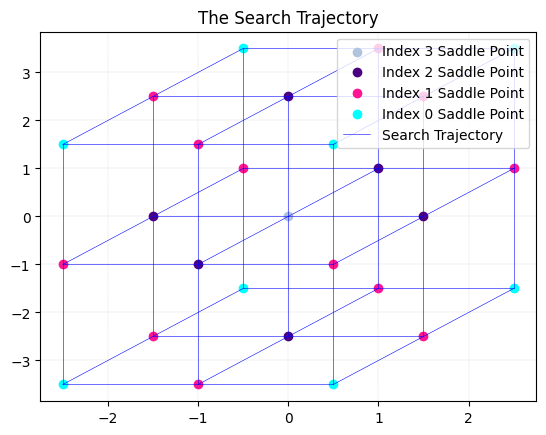

In [7]:
MyLandscape.DrawTrajectory(ContourGridNum=100, ContourGridOut=25, Projection=proj_func)
# Draw the search path. But because of the large dimension, we cannot draw the picture.

We can also draw the solution landscape and save the data.

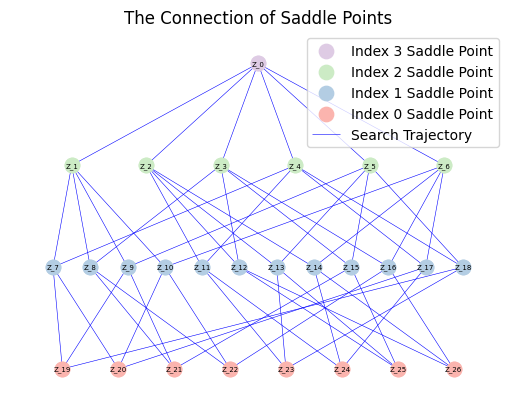

In [8]:
MyLandscape.DrawConnection()
MyLandscape.Save('Ex_Cubic','mat')
# Save the data